#Project-1: Explorary Data Analysis For Machine Learning
####BY IHEB CHAABANE
This notebook is part of my first project required by IBM Machine Learning Program.
#####DATA Source:https://github.com/rfordatascience/tidytuesday/tree/master/data/2019/2019-07-30
####In this Notebook i will clean the data,explore relationship between features and target(Metascore) and if necessary do some feature engineering and finally do hypothesis testing

#Overview

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [3]:
#importing data
df=pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-07-30/video_games.csv")

In [4]:
#creating train and test dataset
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.18,random_state=0)

In [5]:
#First look
train.head()

,number,game,release_date,price,owners,developer,publisher,average_playtime,median_playtime,metascore
9247,1747,PitchFork,"Sep 29, 2016",14.99,"0 .. 20,000",Jacob Velez,Iron Guard Cyber Security,0.0,0.0,NaN
25451,7414,Tombo Breaker VR,"Feb 27, 2018",9.99,"0 .. 20,000",CentVire,CentVire,0.0,0.0,NaN
13904,1997,Dark Cases: The Blood Ruby Collector's Edition,"Jan 11, 2017",9.99,"0 .. 20,000",Boolat Entertainment,Big Fish Games,0.0,0.0,NaN
12829,638,EZ4u,"Sep 18, 2017",0.99,"0 .. 20,000",Egor Domashenkin,Sergey Domashenkin,0.0,0.0,NaN
3047,138,Lords of Xulima,"Nov 14, 2014",19.99,"50,000 .. 100,000",Numantian Games,Numantian Games,0.0,0.0,71.0


In [6]:
train.describe()

,number,price,average_playtime,median_playtime,metascore
count,21884.000000,19343.000000,21875.000000,21873.000000,2357.000000
mean,2899.701243,8.910647,8.850971,5.180862,72.015274
std,2380.058672,12.142740,117.246164,69.356659,10.960251
min,1.000000,0.490000,0.000000,0.000000,20.000000
25%,815.000000,2.990000,0.000000,0.000000,66.000000
50%,2347.000000,5.990000,0.000000,0.000000,73.000000
75%,4514.250000,9.990000,0.000000,0.000000,80.000000
max,8842.000000,595.990000,5670.000000,3293.000000,98.000000


In [7]:
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21884 entries, 9247 to 2732
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   number            21884 non-null  int64  
 1   game              21881 non-null  object 
 2   release_date      21884 non-null  object 
 3   price             19343 non-null  float64
 4   owners            21884 non-null  object 
 5   developer         21756 non-null  object 
 6   publisher         21800 non-null  object 
 7   average_playtime  21875 non-null  float64
 8   median_playtime   21873 non-null  float64
 9   metascore         2357 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 1.8+ MB


In [8]:
#missing values
train.isnull().sum().sort_values()
#comment :there are a lot of missing values in metascore,let's clean them

number                  0
release_date            0
owners                  0
game                    3
average_playtime        9
median_playtime        11
publisher              84
developer             128
price                2541
metascore           19527
dtype: int64

#Data Cleaning 

In [9]:
#Keeping Original data
data=train.copy()

In [10]:
#Deleting rows where the target is missing
train.dropna(inplace=True)

In [11]:
#Removing unnecessary features and adding other ones
l=list(train['release_date'])
lf=[2019 -int(m[len(m)-4:]) for m in l] #2019 is the year when the data was collected
train['game_age']=lf
train.drop(['game','release_date'],inplace=True,axis=1)

In [12]:
train.head()

,number,price,owners,developer,publisher,average_playtime,median_playtime,metascore,game_age
3047,138,19.99,"50,000 .. 100,000",Numantian Games,Numantian Games,0.0,0.0,71.0,5
18955,81,12.99,"0 .. 20,000",Driving Force Games,Dear Villagers,0.0,0.0,79.0,1
2870,10,19.99,"100,000 .. 200,000",Edelweiss,AGM PLAYISM,0.0,0.0,86.0,5
676,102,9.99,"100,000 .. 200,000",Frogwares,Frogwares,0.0,0.0,73.0,10
11289,146,7.99,"100,000 .. 200,000",Broken Rules,Broken Rules,0.0,0.0,76.0,2


In [13]:
train.describe(include='object')

,owners,developer,publisher
count,2205,2205,2205
unique,10,1516,979
top,"0 .. 20,000",Ubisoft Montreal,Ubisoft
freq,389,18,68


In [14]:
train.corr()

,number,price,average_playtime,median_playtime,metascore,game_age
number,1.000000,-0.068975,-0.045168,-0.042282,-0.174288,-0.217485
price,-0.068975,1.000000,0.179847,0.166042,0.168593,-0.339903
average_playtime,-0.045168,0.179847,1.000000,0.863947,0.130978,-0.044880
median_playtime,-0.042282,0.166042,0.863947,1.000000,0.123381,-0.050154
metascore,-0.174288,0.168593,0.130978,0.123381,1.000000,0.077080
game_age,-0.217485,-0.339903,-0.044880,-0.050154,0.077080,1.000000


In [15]:
#Converting categorical variables to dummies
one_hot_encode_cols = train.dtypes[train.dtypes == np.object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()
one_hot_encode_cols

['owners', 'developer', 'publisher']

In [24]:
#one_hot_encode_cols.remove('owners')

train= pd.get_dummies(train, columns=one_hot_encode_cols, drop_first=True)
train.head()


KeyError: ignored

In [16]:
#Creating features: min_owners and max_owners
ls=list(train['owners'])
ls_min=[m[:i]  for m in ls for i in range(len(m)) if ('\xa0..\xa0' in m[i:i+4])]
ls_max=[m[i:]  for m in ls for i in range(len(m)) if ('\xa0..\xa0' in m[i-4:i])]
ls_m=[]
ls_mx=[]
for i in ls_max:
  if(i==''):
    continue
  else:
    i=i.strip(',')
    i=i.replace(',','')    
    i=float(i)
    ls_mx.append(i)
for i in ls_min:
  if(i==''):
    continue
  else:
    i=i.strip(',')
    i=i.replace(',','')    
    i=float(i)
    ls_m.append(i)
    


In [17]:
train['min_owners']=ls_m
train['max_owners']=ls_mx
train.drop(['owners'],inplace=True,axis=1)

In [18]:
train.head()

,number,price,developer,publisher,average_playtime,median_playtime,metascore,game_age,min_owners,max_owners
3047,138,19.99,Numantian Games,Numantian Games,0.0,0.0,71.0,5,50000.0,100000.0
18955,81,12.99,Driving Force Games,Dear Villagers,0.0,0.0,79.0,1,0.0,20000.0
2870,10,19.99,Edelweiss,AGM PLAYISM,0.0,0.0,86.0,5,100000.0,200000.0
676,102,9.99,Frogwares,Frogwares,0.0,0.0,73.0,10,100000.0,200000.0
11289,146,7.99,Broken Rules,Broken Rules,0.0,0.0,76.0,2,100000.0,200000.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f10dfd5ba10>,
      dtype=object)

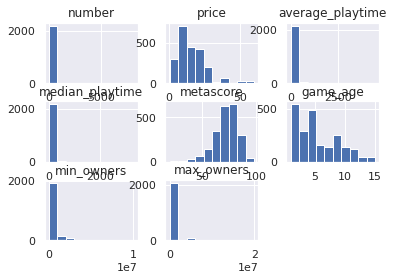

In [19]:
train.hist()

###Create a function to check skewness

In [20]:
def skew_df(data: pd.DataFrame, skew_limit: float) -> pd.DataFrame:
    # Define a limit above which we will log transform
    skew_vals = data.skew()

    # Showing the skewed columns
    skew_cols = (skew_vals
                 .sort_values(ascending=False)
                 .to_frame('Skew')
                 .query('abs(Skew) > {}'.format(skew_limit))
    )
    return skew_cols

In [21]:
skew_col=skew_df(train,0.75)
skew_col

,Skew
number,14.508727
median_playtime,13.001882
average_playtime,10.845011
min_owners,6.685435
max_owners,6.120480
price,1.781694


###Log transformation for skewed variables

In [22]:
for col in skew_col.index.values:
    train['log_' + col] = train[col].apply(np.log1p)

###Ploting log columns that have nearly normal distribution

In [23]:
log_df = train.filter(regex='^log_', axis=1)
train.head()

,number,price,developer,publisher,average_playtime,median_playtime,metascore,game_age,min_owners,max_owners,log_number,log_median_playtime,log_average_playtime,log_min_owners,log_max_owners,log_price
3047,138,19.99,Numantian Games,Numantian Games,0.0,0.0,71.0,5,50000.0,100000.0,4.934474,0.0,0.0,10.819798,11.512935,3.044046
18955,81,12.99,Driving Force Games,Dear Villagers,0.0,0.0,79.0,1,0.0,20000.0,4.406719,0.0,0.0,0.000000,9.903538,2.638343
2870,10,19.99,Edelweiss,AGM PLAYISM,0.0,0.0,86.0,5,100000.0,200000.0,2.397895,0.0,0.0,11.512935,12.206078,3.044046
676,102,9.99,Frogwares,Frogwares,0.0,0.0,73.0,10,100000.0,200000.0,4.634729,0.0,0.0,11.512935,12.206078,2.396986
11289,146,7.99,Broken Rules,Broken Rules,0.0,0.0,76.0,2,100000.0,200000.0,4.990433,0.0,0.0,11.512935,12.206078,2.196113


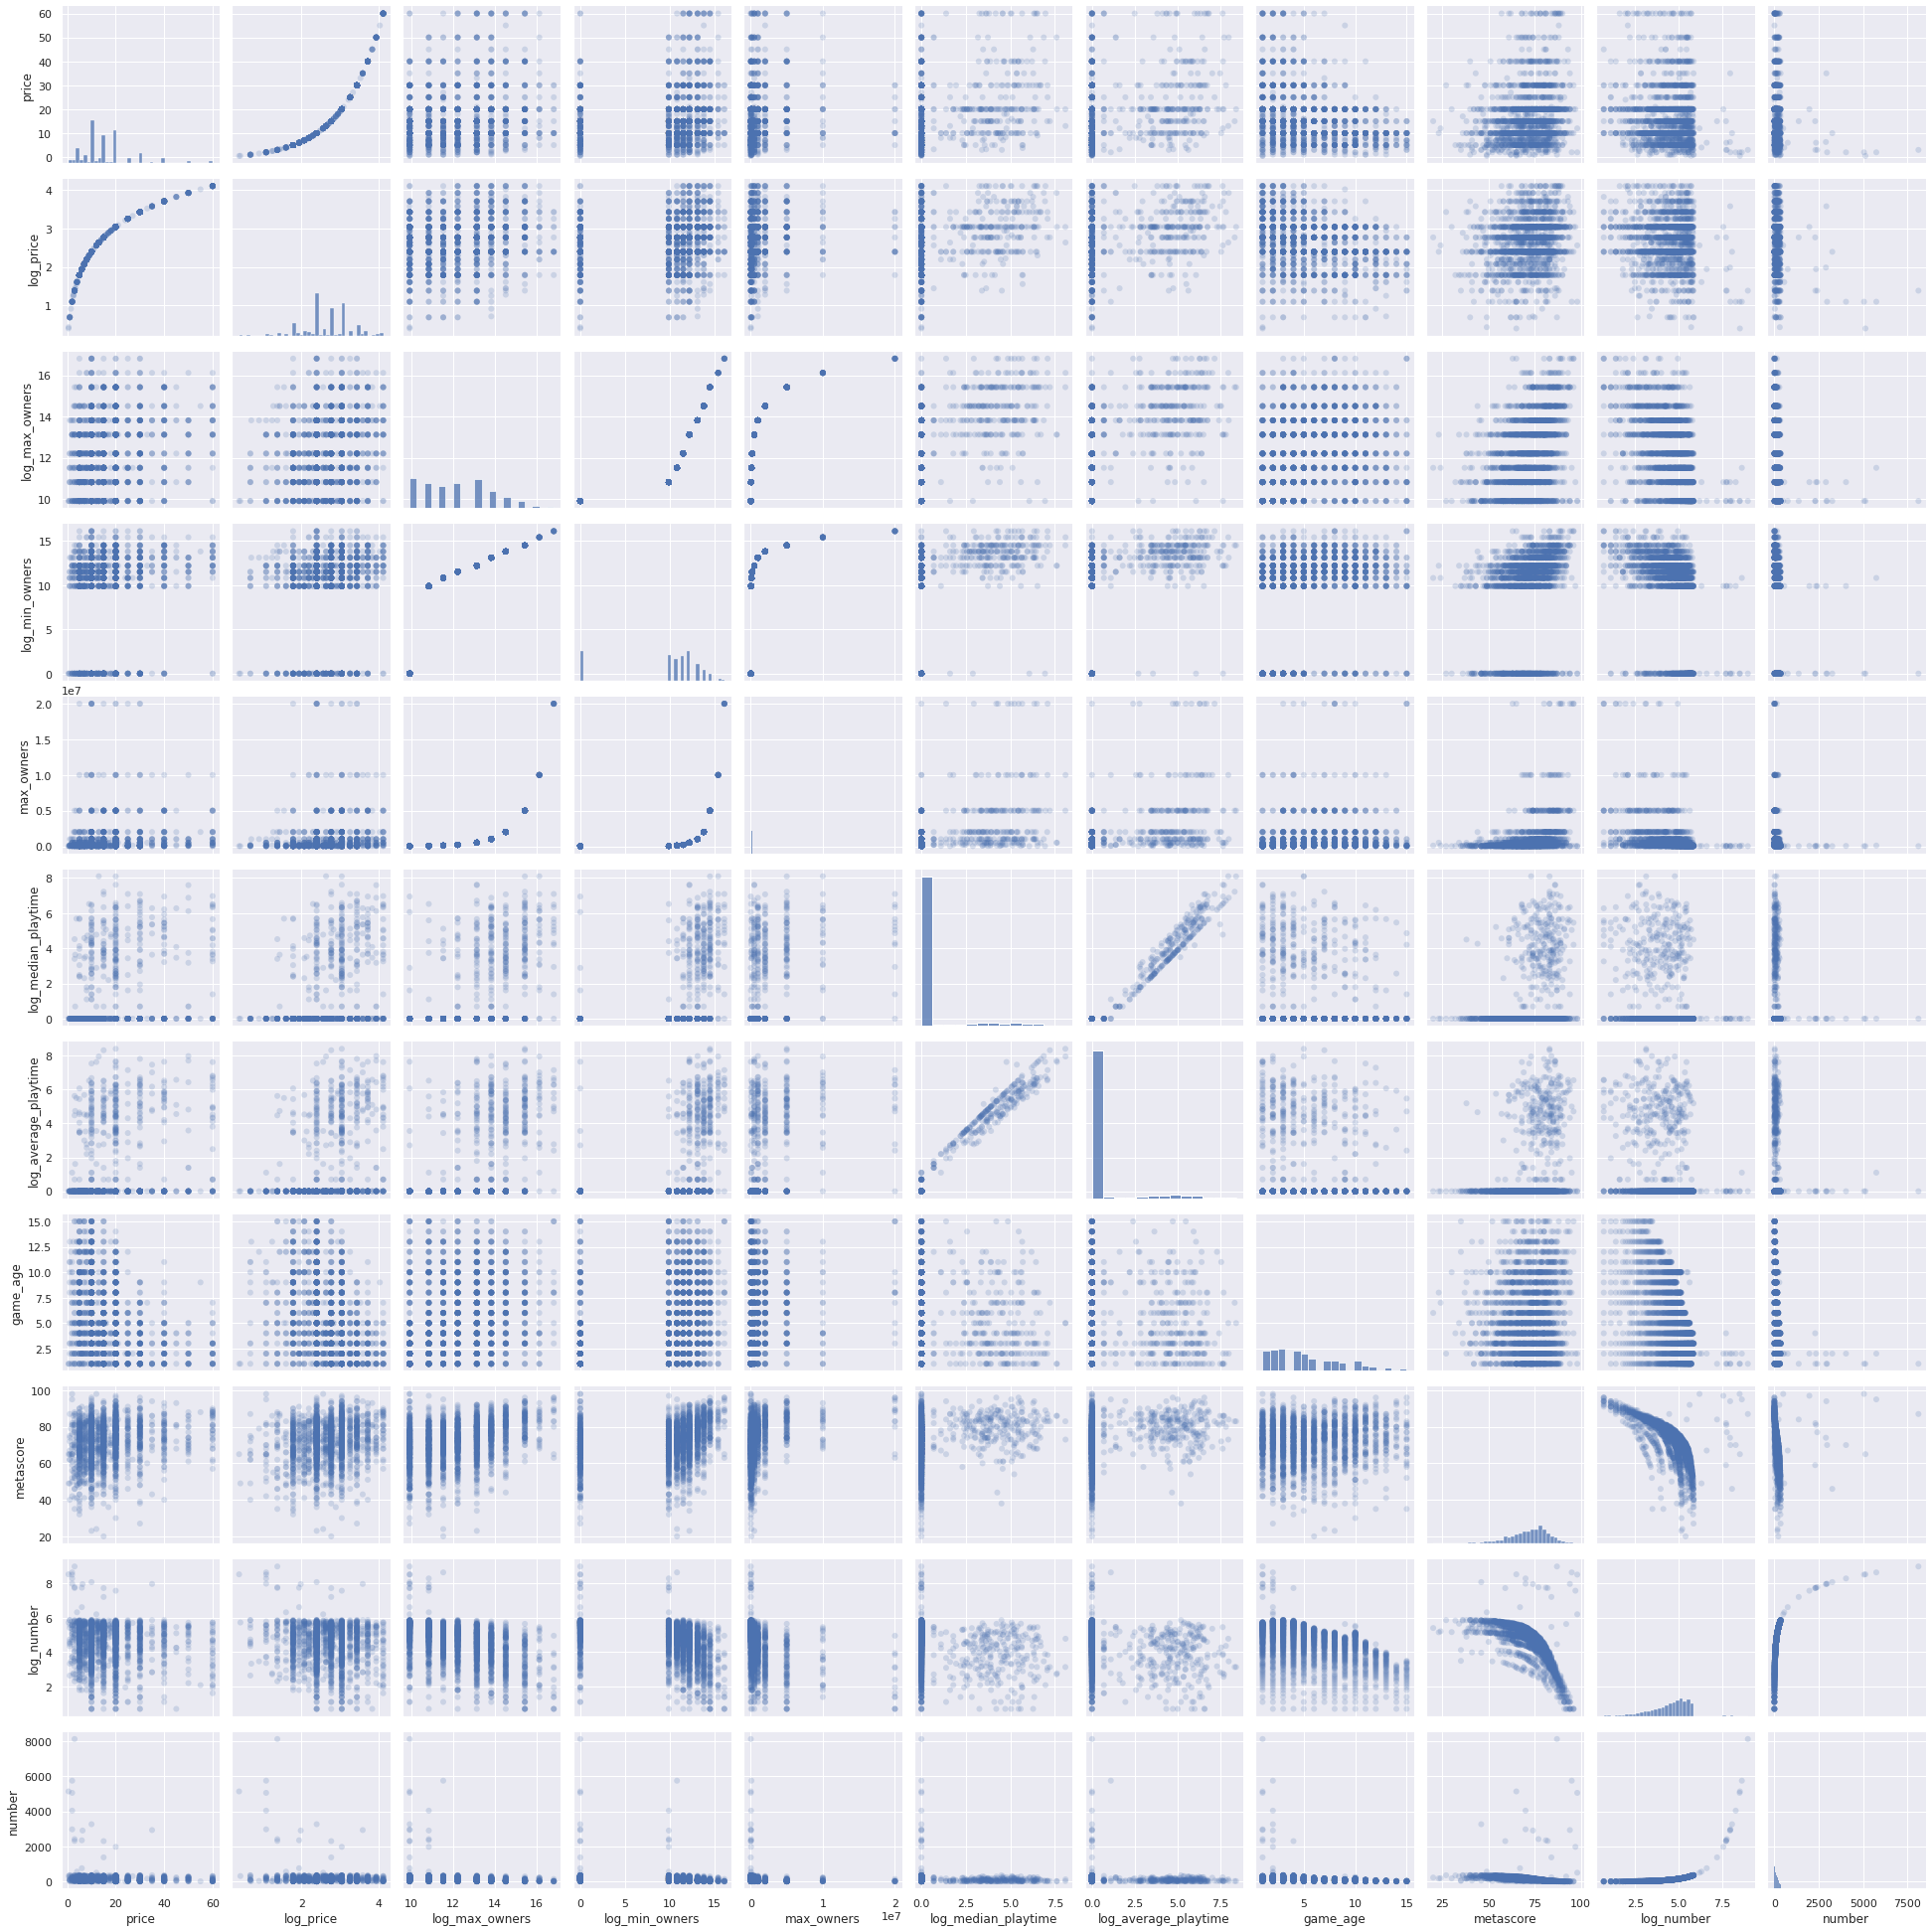

In [25]:
small_df=train[['price','log_price','log_max_owners','log_min_owners','max_owners','log_median_playtime','log_average_playtime','game_age','metascore','log_number','number']]
sns.pairplot(data=small_df,plot_kws=dict(alpha=.2, edgecolor='none'))


#Observations:


*  The target (metascore) has a normal distribution.
*   No strong linear relationship between the features and the target. Linear regression might not be well-suited to this problem.




*  We can try adding polynomial and interaction terms and examine their correlation with the target.

###Adding polynomial Features

In [28]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)

In [29]:
features = ['log_average_playtime', 'log_max_owners','game_age','max_owners']
pf.fit(small_df[features])

PolynomialFeatures()

In [30]:
feat_array = pf.transform(small_df[features])
f_df=pd.DataFrame(feat_array,index=small_df.index, columns = pf.get_feature_names(input_features=features))
f_df.drop('1', axis=1, inplace=True)
f_df.head()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,log_average_playtime,log_max_owners,game_age,max_owners,log_average_playtime^2,log_average_playtime log_max_owners,log_average_playtime game_age,log_average_playtime max_owners,log_max_owners^2,log_max_owners game_age,log_max_owners max_owners,game_age^2,game_age max_owners,max_owners^2
3047,0.0,11.512935,5.0,100000.0,0.0,0.0,0.0,0.0,132.547683,57.564677,1.151294e+06,25.0,500000.0,1.000000e+10
18955,0.0,9.903538,1.0,20000.0,0.0,0.0,0.0,0.0,98.080056,9.903538,1.980708e+05,1.0,20000.0,4.000000e+08
2870,0.0,12.206078,5.0,200000.0,0.0,0.0,0.0,0.0,148.988331,61.030388,2.441216e+06,25.0,1000000.0,4.000000e+10
676,0.0,12.206078,10.0,200000.0,0.0,0.0,0.0,0.0,148.988331,122.060776,2.441216e+06,100.0,2000000.0,4.000000e+10
11289,0.0,12.206078,2.0,200000.0,0.0,0.0,0.0,0.0,148.988331,24.412155,2.441216e+06,4.0,400000.0,4.000000e+10


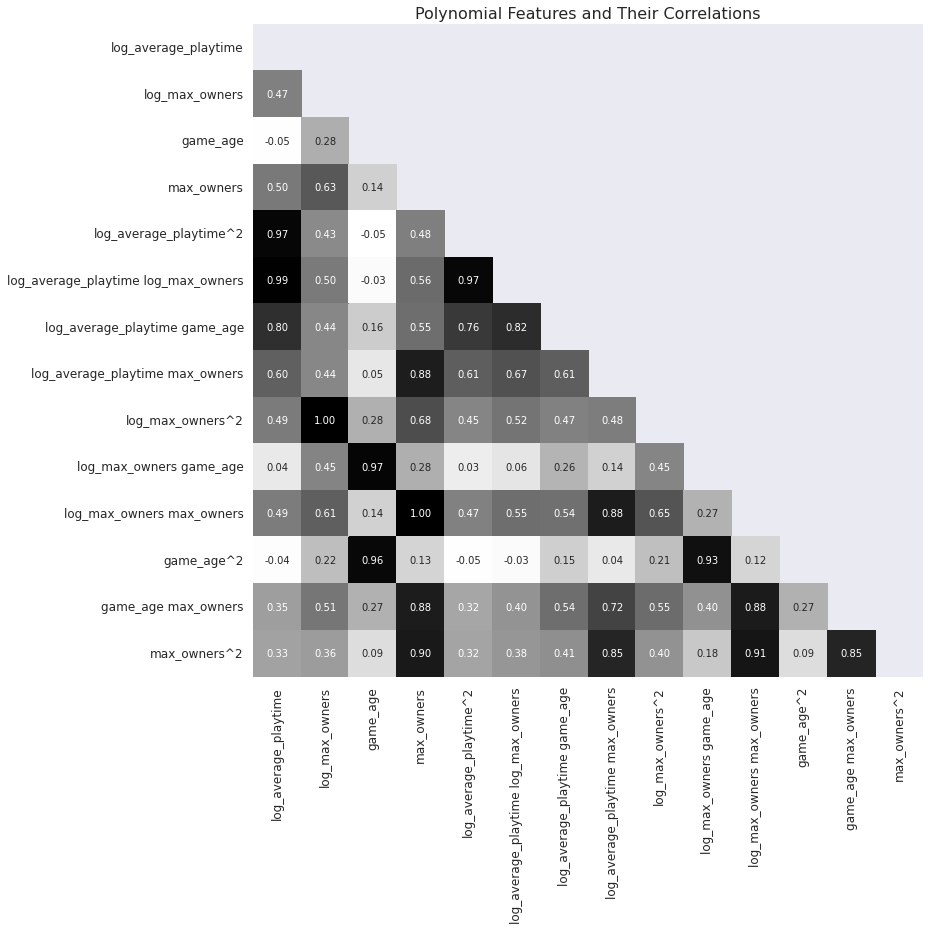

In [31]:
# Plot a heatmap of correlations
with sns.axes_style('dark'):
    fig, axes = plt.subplots(figsize=(12,12))
    mask = np.triu(np.ones_like(f_df.corr(), dtype=bool))
    sns.heatmap(f_df.corr(),
                mask=mask,
                cmap='binary',
                cbar=False,
                annot=True,
                annot_kws={'size':10},
                fmt='.2f')
    plt.title('Polynomial Features and Their Correlations', fontsize=16)
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)

###Joining these new columns to our dataset

In [32]:
for col in f_df.columns:
    if col in small_df.columns:
        f_df.drop(col, axis=1, inplace=True)
small_df = small_df.join(f_df)

In [33]:
small_df.head()

,price,log_price,log_max_owners,log_min_owners,max_owners,log_median_playtime,log_average_playtime,game_age,metascore,log_number,number,log_average_playtime^2,log_average_playtime log_max_owners,log_average_playtime game_age,log_average_playtime max_owners,log_max_owners^2,log_max_owners game_age,log_max_owners max_owners,game_age^2,game_age max_owners,max_owners^2
3047,19.99,3.044046,11.512935,10.819798,100000.0,0.0,0.0,5,71.0,4.934474,138,0.0,0.0,0.0,0.0,132.547683,57.564677,1.151294e+06,25.0,500000.0,1.000000e+10
18955,12.99,2.638343,9.903538,0.000000,20000.0,0.0,0.0,1,79.0,4.406719,81,0.0,0.0,0.0,0.0,98.080056,9.903538,1.980708e+05,1.0,20000.0,4.000000e+08
2870,19.99,3.044046,12.206078,11.512935,200000.0,0.0,0.0,5,86.0,2.397895,10,0.0,0.0,0.0,0.0,148.988331,61.030388,2.441216e+06,25.0,1000000.0,4.000000e+10
676,9.99,2.396986,12.206078,11.512935,200000.0,0.0,0.0,10,73.0,4.634729,102,0.0,0.0,0.0,0.0,148.988331,122.060776,2.441216e+06,100.0,2000000.0,4.000000e+10
11289,7.99,2.196113,12.206078,11.512935,200000.0,0.0,0.0,2,76.0,4.990433,146,0.0,0.0,0.0,0.0,148.988331,24.412155,2.441216e+06,4.0,400000.0,4.000000e+10


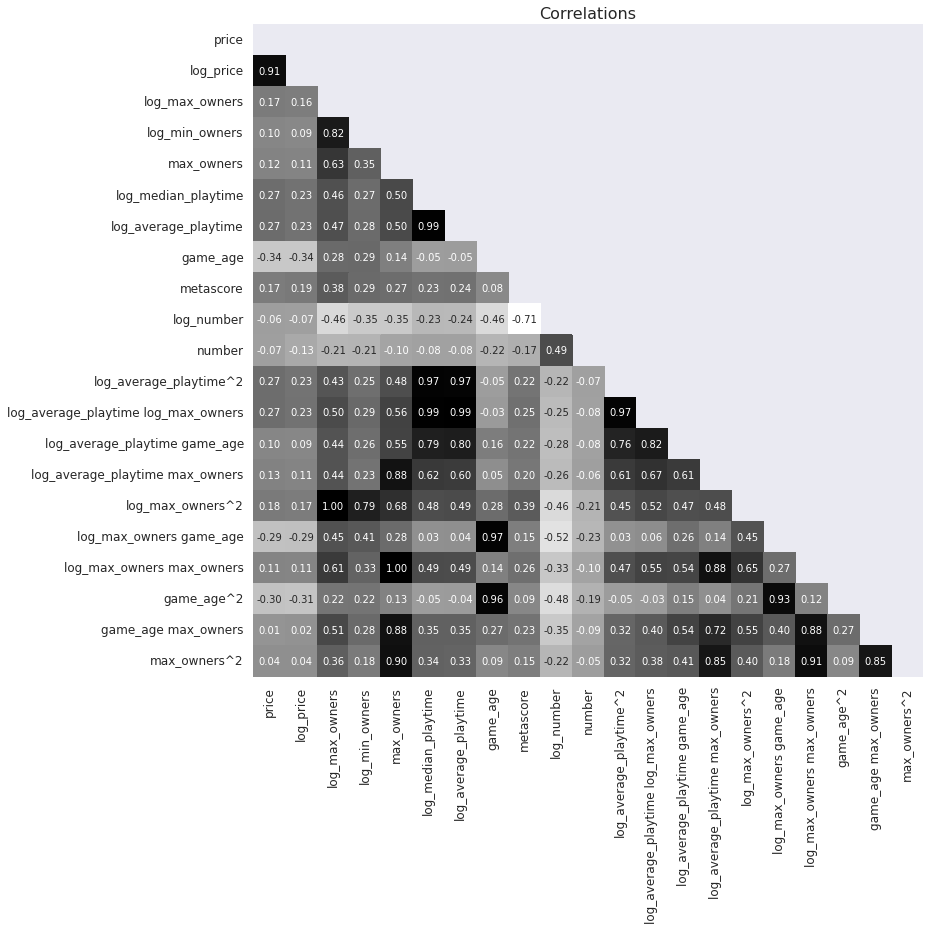

In [34]:
# Ploting a heatmap of correlations
with sns.axes_style('dark'):
    fig, axes = plt.subplots(figsize=(12,12))
    mask = np.triu(np.ones_like(small_df.corr(), dtype=bool))
    sns.heatmap(small_df.corr(),
                mask=mask,
                cmap='binary',
                cbar=False,
                annot=True,
                annot_kws={'size':10},
                fmt='.2f')
    plt.title('Correlations', fontsize=16)
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)

#FINAL DATASET

In [35]:
small_df.head()

,price,log_price,log_max_owners,log_min_owners,max_owners,log_median_playtime,log_average_playtime,game_age,metascore,log_number,number,log_average_playtime^2,log_average_playtime log_max_owners,log_average_playtime game_age,log_average_playtime max_owners,log_max_owners^2,log_max_owners game_age,log_max_owners max_owners,game_age^2,game_age max_owners,max_owners^2
3047,19.99,3.044046,11.512935,10.819798,100000.0,0.0,0.0,5,71.0,4.934474,138,0.0,0.0,0.0,0.0,132.547683,57.564677,1.151294e+06,25.0,500000.0,1.000000e+10
18955,12.99,2.638343,9.903538,0.000000,20000.0,0.0,0.0,1,79.0,4.406719,81,0.0,0.0,0.0,0.0,98.080056,9.903538,1.980708e+05,1.0,20000.0,4.000000e+08
2870,19.99,3.044046,12.206078,11.512935,200000.0,0.0,0.0,5,86.0,2.397895,10,0.0,0.0,0.0,0.0,148.988331,61.030388,2.441216e+06,25.0,1000000.0,4.000000e+10
676,9.99,2.396986,12.206078,11.512935,200000.0,0.0,0.0,10,73.0,4.634729,102,0.0,0.0,0.0,0.0,148.988331,122.060776,2.441216e+06,100.0,2000000.0,4.000000e+10
11289,7.99,2.196113,12.206078,11.512935,200000.0,0.0,0.0,2,76.0,4.990433,146,0.0,0.0,0.0,0.0,148.988331,24.412155,2.441216e+06,4.0,400000.0,4.000000e+10


In [36]:
small_df.shape

(2205, 21)

#Hypothesis Testing

#####H0 : We have a normally distributed trget
#####H1: We haven't

In [38]:
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test

In [39]:
normaltest(small_df.metascore.values)

NormaltestResult(statistic=206.25949858059397, pvalue=1.626743061994561e-45)

p-value<0.05 ===> we reject the null hypothesis